In [1]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [2]:
df = pd.read_csv('sd.csv',sep='\t')
df.head()

,Post,X,Y
0,서울중앙,183.988196,0
1,광화문,186.721916,0
2,서대문,185.824437,0
3,동대문,166.631332,0
4,서울광진,181.858226,0


In [3]:
X = df.iloc[:, [1, 2]].values # shape
m=X.shape[0] # X
n=X.shape[1] # Y

In [4]:
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name] # 폰트 검색

[('KoPubBatang', 'C:\\WINDOWS\\Fonts\\KoPub Batang Light.ttf'),
 ('KoPubWorldDotum', 'C:\\Windows\\Fonts\\KoPubWorld Dotum Bold.ttf'),
 ('KoPubBatang', 'C:\\WINDOWS\\Fonts\\KoPub Batang Medium.ttf'),
 ('KoPubWorldBatang', 'C:\\Windows\\Fonts\\KoPubWorld Batang Medium.ttf'),
 ('KoPubBatang', 'C:\\WINDOWS\\Fonts\\KoPub Batang Bold.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Light.ttf'),
 ('KoPubWorldBatang', 'C:\\WINDOWS\\Fonts\\KoPubWorld Batang Bold.ttf'),
 ('KoPubWorldBatang', 'C:\\Windows\\Fonts\\KoPubWorld Batang Bold.ttf'),
 ('KoPubDotum', 'C:\\WINDOWS\\Fonts\\KoPub Dotum Light.ttf'),
 ('KoPubWorldBatang', 'C:\\WINDOWS\\Fonts\\KoPubWorld Batang Light.ttf'),
 ('KoPubWorldDotum', 'C:\\WINDOWS\\Fonts\\KoPubWorld Dotum Medium.ttf'),
 ('KoPubWorldDotum', 'C:\\WINDOWS\\Fonts\\KoPubWorld Dotum Light.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Bold.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPub Dotum Medium.ttf'),
 ('KoPubDotum', 'C:\\WINDOWS\\Fonts\\KoPub Dotum 

In [5]:
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.2) # Seaborn 설정

In [40]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=40, init="random", n_init=1, max_iter=1000, random_state=1).fit(X)

In [41]:
model.labels_

array([15, 27, 15, 32, 15, 27, 27, 36, 27, 27, 15, 15, 27, 15, 27, 27, 27,
       15,  5, 34, 17,  5, 30,  0, 12,  1, 34, 25,  5, 12, 34, 32, 29, 39,
       31, 30, 15, 25, 15, 15,  5, 15, 15,  5, 15, 30,  0, 15, 36, 15,  1,
       12, 32, 12,  6, 23, 37, 37, 12, 29, 37, 15, 25,  6,  0,  1, 12, 39,
       18, 12, 39,  7, 35,  6, 33,  7,  0,  4,  9,  7, 16, 13,  9, 33, 16,
        9, 31,  2, 33, 23,  8, 18,  1,  9,  8, 28, 23, 32, 34, 32, 25, 12,
        6,  6, 17, 25, 23, 17, 23, 17,  1,  1,  1,  0,  6,  6, 37, 36, 37,
       37,  0, 29,  6, 21, 23,  0,  0,  1, 31,  1, 39, 31,  1,  1, 31, 24,
       38,  4, 38, 35,  8, 35, 24,  4,  2, 20,  4, 28, 20, 38,  1,  4,  3,
        9, 29,  9, 18, 11, 19, 10, 24,  0,  6, 23,  1, 30, 23,  6, 23,  8,
       28, 23,  0, 39, 16,  2,  8,  1, 28,  6, 23, 16,  0, 38, 28, 29, 19,
        6, 33, 39,  4,  8,  2, 35, 26, 16,  2, 11, 18,  3, 24,  9,  1,  4,
       16, 21, 28,  9, 19, 19, 29, 18, 26,  9, 11, 26, 10, 21, 39, 24, 16,
       31,  4, 10,  2, 33

In [8]:
df2=pd.DataFrame(model.labels_)

In [9]:
df2.to_csv("sd_res_40.csv",index=False,header=False)

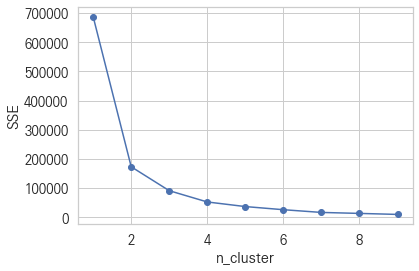

In [12]:
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X)
    sse.append(model.inertia_)
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()
    

In [13]:
from sklearn.metrics import pairwise_distances
dist_out = 1-pairwise_distances(X)

In [36]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference=-100000).fit(dist_out)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [42]:
n_clusters_

22

In [38]:
labels

array([ 1,  1,  1,  3,  1,  0,  0,  3,  0,  0,  1,  1,  0,  1,  0,  0,  0,
        2,  2,  3,  3,  2,  4,  9,  4, 17,  3,  4,  2,  4,  2,  3,  7, 15,
        7,  4,  1,  6,  1,  2,  2,  1,  1,  2,  1,  4,  9,  2,  3,  1, 17,
        4,  3,  4,  5,  6, 15, 17,  4,  7, 17,  2,  4,  5,  9,  9,  4, 15,
       18,  4, 15, 10, 20,  5, 10, 10,  9,  8, 11, 10, 20, 21, 12, 10, 12,
       12,  7,  8, 10,  6, 15, 18, 17, 11,  7, 14,  6,  3,  2,  3,  4,  4,
        5,  5,  3,  4,  6,  3,  6,  3, 17, 17, 17,  9,  5,  5, 17,  3, 15,
       15,  9,  7,  5, 18,  6,  9,  5, 17,  7,  9, 15,  7,  9, 17,  7, 14,
       21,  8, 21, 20, 15, 20, 14,  8, 11, 16,  8, 16, 16, 21,  9,  8, 21,
       12,  7, 11, 18, 21, 13, 19, 14,  9,  5,  6,  9,  4,  6,  5,  6,  7,
       14,  6,  9, 15, 20, 11,  7,  9, 14,  5,  6, 20,  9, 21, 16,  7, 13,
        5, 10, 15,  8, 15, 11, 20, 18, 12, 11,  8, 18, 21, 14, 12, 17,  8,
       12, 18, 14, 11, 13, 13,  7, 18, 18, 12, 21, 18, 19, 18, 15, 14, 20,
        7,  8, 19, 11, 10